## Homework 1 - Time Series Analysis

Author: Rachel Swick
Date: 21 April, 2025

Purpose: Perform a time series plotting for region of your choice.

In [1]:
# Load libraries
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [3]:
# Specify search terms to query catalog for CESM2-WACCM data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: 
source_id_1 = ['CESM2-WACCM']

# experiment_id: historical and SSP 245 and 585
experiment_ids = ['historical', 'ssp245', 'ssp585']

# member_id
member_id_1 = 'r3i1p1f1'

# table_id: monthly ocean data
table_id = 'Omon' 

# variable_id: sea surface temperature 
variable_id = 'tos' 

In [4]:
# Specify search terms to query catalog for NorESM2-MM data
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id
source_id_2 = ['NorESM2-MM']

# experiment_id: historical and SSP 245 and 585
experiment_ids = ['historical', 'ssp245', 'ssp585']

# member_id
member_id_2 = 'r1i1p1f1'

# table_id: monthly ocean data
table_id = 'Omon' 

# variable_id: sea surface temperature 
variable_id = 'tos' 

In [5]:
# Search through catalog, store results in "res" variable
res_1 = catalog.search(activity_id=activity_ids, source_id=source_id_1, experiment_id=experiment_ids, 
                     member_id=member_id_1, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_1.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2-WACCM/his...,NaN,20190808
1,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2-WACCM/his...,NaN,20190808
2,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2-WA...,NaN,20200206
3,ScenarioMIP,NCAR,CESM2-WACCM,ssp245,r3i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2-WA...,NaN,20200206
4,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2-WA...,NaN,20200206
5,ScenarioMIP,NCAR,CESM2-WACCM,ssp585,r3i1p1f1,Omon,tos,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2-WA...,NaN,20200206


In [6]:
# Search through catalog, store results in "res" variable
res_2 = catalog.search(activity_id=activity_ids, source_id=source_id_2, experiment_id=experiment_ids, 
                     member_id=member_id_2, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_2.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCC,NorESM2-MM,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/NCC/NorESM2-MM/histo...,NaN,20191108
1,ScenarioMIP,NCC,NorESM2-MM,ssp585,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCC/NorESM2-M...,NaN,20191108
2,ScenarioMIP,NCC,NorESM2-MM,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCC/NorESM2-M...,NaN,20191108


In [7]:
# Read in the historical data file for model 1
hist_data_1 = xr.open_zarr(res_1.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP245 data file for model 1
ssp245_data_1 = xr.open_zarr(res_1.df['zstore'][2], storage_options={'anon': True})

# Read in the SSP585 data file for model 1
ssp585_data_1 = xr.open_zarr(res_1.df['zstore'][4], storage_options={'anon': True})

In [9]:
# Read in the historical data file for model 2
hist_data_2 = xr.open_zarr(res_2.df['zstore'][0], storage_options={'anon': True})

# Read in the SSP245 data file for model 2
ssp585_data_2 = xr.open_zarr(res_2.df['zstore'][1], storage_options={'anon': True})

# Read in the SSP585 data file for model 2
ssp245_data_2 = xr.open_zarr(res_2.df['zstore'][2], storage_options={'anon': True})

## Choose a Region of Interest

I am interested in the projected changes in sea surface temperature occurring around the California Channel Islands.

a. The Channel Islands have a Mediterranean type climate. Meaning temperatures are relaltively neutral year round, hovering around 50-70 degrees. This type of climate is characterized by cool, wet winters, and moderately warm, dry summers. Water temperatures around the Channel Islands are impacted by its proximity to the Humboldt Current, which brings cold, nutrient rich waters from up north to the area. Climate change is projected to increase ocean temperatures across the world, so I would expect ocean temperatures around the Channel Islands to also be projected to increase.

In [11]:
# Concatenate historical and future projection data CESM2-WACCM
cesm2_waccm_data = xr.concat([hist_data_1, ssp245_data_1], dim="time")
cesm2_waccm_data_2 = xr.concat([hist_data_1, ssp585_data_1], dim="time")

# Concatenate historical and future projection data NorESM2-MM
noresm2_mm_data = xr.concat([hist_data_2, ssp585_data_2], dim="time")
noresm2_mm_data_2 = xr.concat([hist_data_2, ssp245_data_2], dim="time")

In [12]:
# Convert time to datetime64 format
time = cesm2_waccm_data.time.astype('datetime64[ns]')
time = cesm2_waccm_data_2.time.astype('datetime64[ns]')
time = noresm2_mm_data.time.astype('datetime64[ns]')
time = noresm2_mm_data_2.time.astype('datetime64[ns]')

In [19]:
# Define min/max bounds for region of interest (Channel Islands)
lat_min, lat_max = 33, 34
lon_min, lon_max = -119, -120

# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_CI_lat_1a = (cesm2_waccm_data.lat >= lat_min) & (cesm2_waccm_data.lat <= lat_max)
tos_CI_lon_1a = (cesm2_waccm_data.lon >= lon_min) & (cesm2_waccm_data.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tos_CI_1a = cesm2_waccm_data.where(tos_CI_lat_1a & tos_CI_lon_1a, drop=True)

# Average over lat, lon dimensions to get a time series
tos_CI_1a = tos_CI_1a.mean(dim=["nlat", "nlon"])

In [20]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_CI_lat_1b = (cesm2_waccm_data_2.lat >= lat_min) & (cesm2_waccm_data_2.lat <= lat_max)
tos_CI_lon_1b = (cesm2_waccm_data_2.lon >= lon_min) & (cesm2_waccm_data_2.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tos_CI_1b = cesm2_waccm_data_2.where(tos_CI_lat_1b & tos_CI_lon_1b, drop=True)

# Average over lat, lon dimensions to get a time series
tos_CI_1b = tos_CI_1b.mean(dim=["nlat", "nlon"])

In [32]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tos_CI_lat_2a = (noresm2_mm_data.j >= lat_min) & (noresm2_mm_data.j <= lat_max)
tos_CI_lon_2a = (noresm2_mm_data.i >= lon_min) & (noresm2_mm_data.i <= lon_max)

# Find points where the mask value is True, drop all other points
tos_CI_2a = cesm2_waccm_data_2.where(tos_CI_lat_2a & tos_CI_lon_2a, drop=True)

# Average over lat, lon dimensions to get a time series
tos_CI_2a = tos_CI_2a.mean(dim=["nlat", "nlon"])

ValueError: Dimensions {'i', 'j'} do not exist. Expected one or more of Frozen({'nlat': 384, 'nlon': 320, 'vertices': 4, 'time': 3012, 'd2': 2})

In [22]:
noresm2_mm_data

<xarray.Dataset>
Dimensions:             (i: 360, j: 385, time: 3012, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
    latitude            (j, i) float64 -80.11 -80.11 -80.11 ... 62.35 62.11
    longitude           (j, i) float64 250.5 251.5 252.5 ... 250.1 250.1 250.0
  * time                (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (time, j, i) float32 dask.array<chunksize=(185, 385, 360), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(1980, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(1980, 385, 360, 4), meta=np.ndarray>
Attributes: (12/52)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    tracking_id:               hdl:21.14100/1925913b-617e-4d4f-83ce-496585a51...
    variable_id:               tos
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/1925913b-617e-4d4f-83ce-496585a51...
    version_id:                v20191108

# Plot Time Series

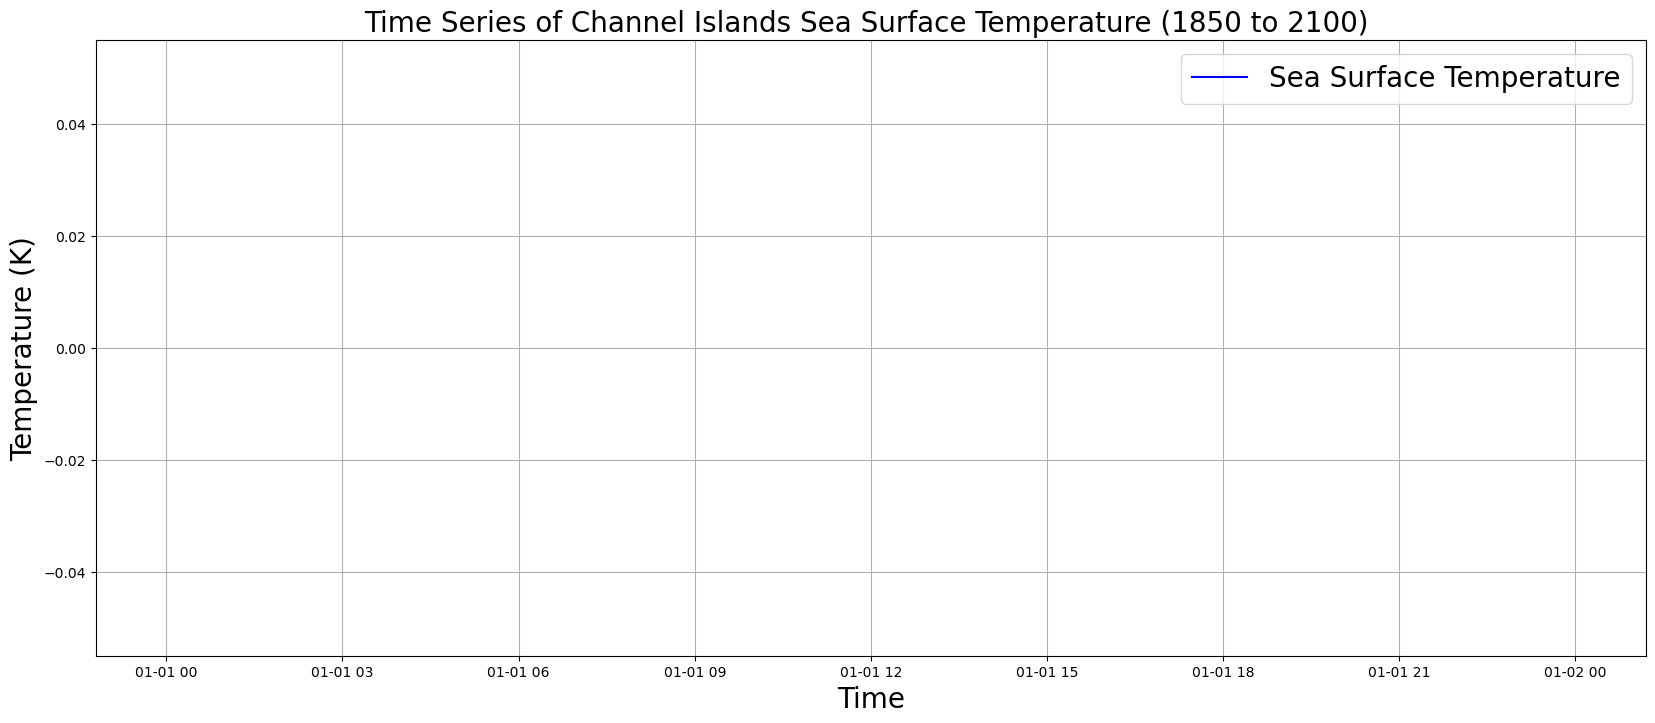

In [34]:


fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_CI_1b.tos, label='Sea Surface Temperature', color='b')
ax.set_title("Time Series of Channel Islands Sea Surface Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (K)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()